In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2
import cv2
import time
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
video_features = np.load("/content/drive/MyDrive/FYP/Code/Emotion-1903/video_features.npy",allow_pickle=True)
audio_features = np.load("/content/drive/MyDrive/FYP/Code/Emotion-1903/audio_features.npy",allow_pickle=True)
labels = np.load("/content/drive/MyDrive/FYP/Code/Emotion-1903/labels.npy",allow_pickle=True)

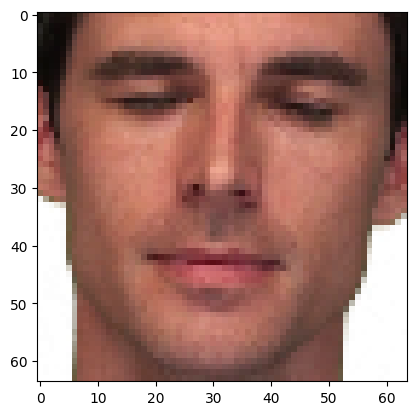

In [ ]:
for i in range(len(video_features)):
  for k in range(6):
    video_features[i][k] = cv2.cvtColor(video_features[i][k], cv2.COLOR_BGR2RGB)
plt.imshow(video_features[0][0])


In [ ]:
print(audio_features.shape)
print(video_features.shape)
print(labels.shape)

(1440, 182)
(1440, 6, 64, 64, 3)
(1440, 8)


In [ ]:
video_features_train,video_features_test,audio_features_train,audio_features_test,labels_train,labels_test = train_test_split(video_features,audio_features,labels,test_size=0.2,random_state=101)
video_features_test,video_features_val,audio_features_test,audio_features_val,labels_test,labels_val = train_test_split(video_features_test,audio_features_test,labels_test,test_size=0.5,random_state=101)

In [ ]:
print(video_features_train.shape)
print(video_features_val.shape)
print(video_features_test.shape)
print(audio_features_train.shape)
print(audio_features_val.shape)
print(audio_features_test.shape)
print(labels_train.shape)
print(labels_val.shape)
print(labels_test.shape)

(1152, 6, 64, 64, 3)
(144, 6, 64, 64, 3)
(144, 6, 64, 64, 3)
(1152, 182)
(144, 182)
(144, 182)
(1152, 8)
(144, 8)
(144, 8)


In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/FYP/Code/Emotion-1903/fusion_batch_normalisation.h5")
score = model.evaluate([video_features_test,audio_features_test],labels_test)
print("Accuracy : ",score[1]*100)

5/5 [==============================] - 32s 6s/step - loss: 1.2609 - accuracy: 0.6944
Accuracy :  69.44444179534912


In [ ]:
# Calculate mean and standard deviation
video_mean = np.mean(video_features_train, axis=0)
video_std = np.std(video_features_train, axis=0)

# Print mean and standard deviation
print("Video Mean:", video_mean)
print("Video Standard Deviation:", video_std)

Video Mean: [[[[ 61.67881944  53.67795139  47.73524306]
   [ 49.94618056  39.95920139  33.54600694]
   [ 48.07291667  35.33246528  28.34722222]
   ...
   [ 66.40625     59.03732639  53.54427083]
   [ 85.8359375   79.52430556  74.23958333]
   [106.00173611 100.55642361  95.68836806]]

  [[ 61.86631944  53.91579861  48.16927083]
   [ 49.98350694  40.01909722  33.81076389]
   [ 48.88802083  35.95225694  29.07725694]
   ...
   [ 66.33854167  59.13975694  54.00520833]
   [ 85.34027778  79.25086806  74.26302083]
   [105.43663194 100.12586806  95.45833333]]

  [[ 62.93923611  55.09027778  49.45052083]
   [ 50.78645833  40.85850694  34.59201389]
   [ 49.48611111  36.32986111  29.42013889]
   ...
   [ 65.99479167  58.89236111  53.96527778]
   [ 85.24045139  79.33333333  74.63802083]
   [104.98177083  99.78125     95.27083333]]

  ...

  [[232.43402778 230.58854167 229.28559028]
   [229.50173611 227.06944444 225.47569444]
   [226.53732639 223.35677083 221.26649306]
   ...
   [232.38368056 230.60

In [ ]:
# Calculate mean and standard deviation
audio_mean = np.mean(audio_features_train, axis=0)
audio_std = np.std(audio_features_train, axis=0)

# Print mean and standard deviation
print("Audio Mean:", audio_mean)
print("Audio Standard Deviation:", audio_std)

Audio Mean: [-6.13972604e+02  6.58410326e+01 -5.05488621e+00  1.02232568e+01
 -3.45934904e-01  8.17583200e+00 -8.45287828e+00  8.67700505e-01
 -7.24383349e+00 -5.63916876e+00 -4.04169373e+00 -1.95029414e+00
 -1.71467938e+00 -3.12842566e+00 -2.96911007e+00 -3.29096914e-01
 -2.41445432e+00 -7.32330443e-01 -1.57228372e+00 -2.18078731e+00
 -1.72566799e+00 -1.40622721e+00 -9.77112512e-01 -7.48302193e-01
 -1.90798917e+00 -2.34900254e-01 -1.45293894e+00 -4.24085810e-01
 -1.01844776e+00 -2.96693227e-01 -3.38906436e-01  3.20111067e-01
 -2.49671971e-01  6.44039528e-01  5.46313639e-01  5.14289601e-01
  5.95709925e-01  7.28347814e-01  4.21616188e-01  9.24077476e-01
  6.47296208e-01  6.41858579e-01  6.45279880e-01  6.53428771e-01
  6.70533801e-01  6.81642740e-01  6.85487206e-01  6.76200117e-01
  6.79821074e-01  6.71249777e-01  6.70545116e-01  6.62303529e-01
  8.73251492e-02  5.09207691e-03  7.08856357e-03  2.39639041e-02
  6.69419503e-02  1.17028096e-01  1.84643486e-01  2.69086974e-01
  3.26140107e